IMPORTS

In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
df = pd.read_csv('train_csv.csv')

In [0]:
df.reset_index(drop=True, inplace=True)

In [82]:
df.shape

(80, 3)

In [83]:
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


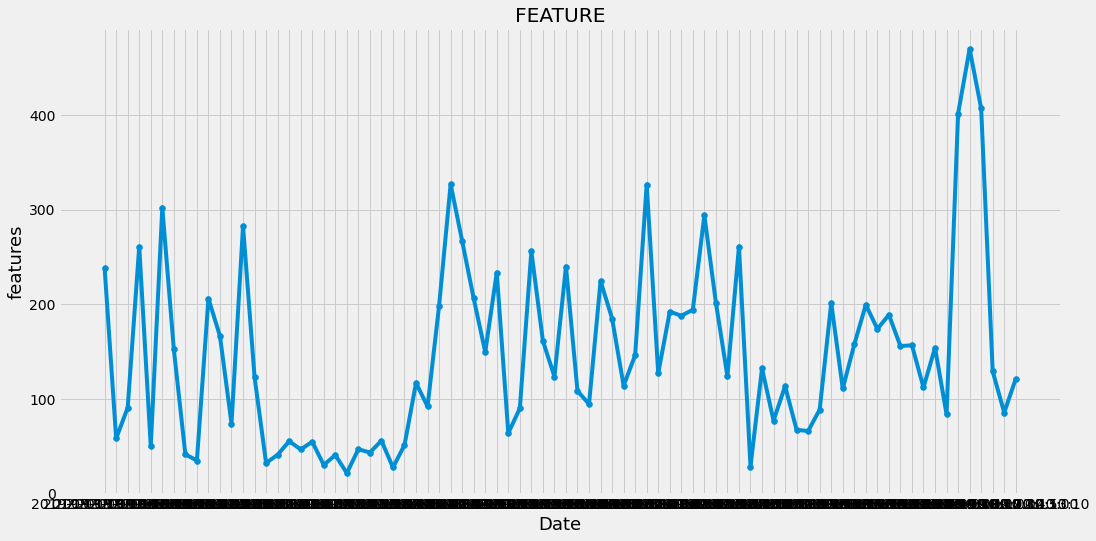

In [84]:
#Visualize the features
plt.figure(figsize=(16,8))
plt.title('FEATURE')
plt.scatter(df['time'], df['feature'])
plt.plot(df['time'], df['feature'])

plt.xlabel('Date',fontsize=18)
plt.ylabel('features',fontsize=18)
plt.show()

Feature Engineering

In [0]:
#Create a new dataframe with only the 'feature' column
data = df.filter(['feature'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [86]:
training_data_len

64

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [88]:
len(scaled_data)

80

Train and Test Split

In [89]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
len(train_data)

64

In [0]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(1, len(train_data)):
    x_train.append(train_data[i-1:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Build the Architecture

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# from keras.layers import Dropout

# # Initialising the RNN
# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# # For Full connection layer we use dense
# # As the output is 1D so we use unit=1
# model.add(Dense(units = 1))
# # Compiling the RNN
# # For optimizer we can go through keras optimizers Docomentation
# # As it is regression problem so we use mean squared error
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')


Train The Model

In [94]:
#Train the model
model.fit(x_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0992
Epoch 2/100
63/63 [==============================] - 0s 153us/step - loss: 0.0909
Epoch 3/100
63/63 [==============================] - 0s 195us/step - loss: 0.0821
Epoch 4/100
63/63 [==============================] - 0s 231us/step - loss: 0.0739
Epoch 5/100
63/63 [==============================] - 0s 244us/step - loss: 0.0658
Epoch 6/100
63/63 [==============================] - 0s 232us/step - loss: 0.0589
Epoch 7/100
63/63 [==============================] - 0s 189us/step - loss: 0.0522
Epoch 8/100
63/63 [==============================] - 0s 224us/step - loss: 0.0469
Epoch 9/100
63/63 [==============================] - 0s 224us/step - loss: 0.0416
Epoch 10/100
63/63 [==============================] - 0s 207us/step - loss: 0.0387
Epoch 11/100
63/63 [==============================] - 0s 202us/step - loss: 0.0367
Epoch 12/100
63/63 [==============================] - 0s 192us/step - loss: 0.0356
Epoch 13/100
6

Testing Dataset 

In [95]:
#Test data set
test_data = scaled_data[training_data_len - 1: , : ]
len(test_data)

17

In [0]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(1,len(test_data)):
    x_test.append(test_data[i-1:i,0])

In [0]:
# x_test

In [0]:
# y_test

In [99]:
len(x_test)

16

In [100]:
len(y_test)

16

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

Make Predictions

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

Calculate RMSE

In [104]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

112.14445698173475

Visualizations of Results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


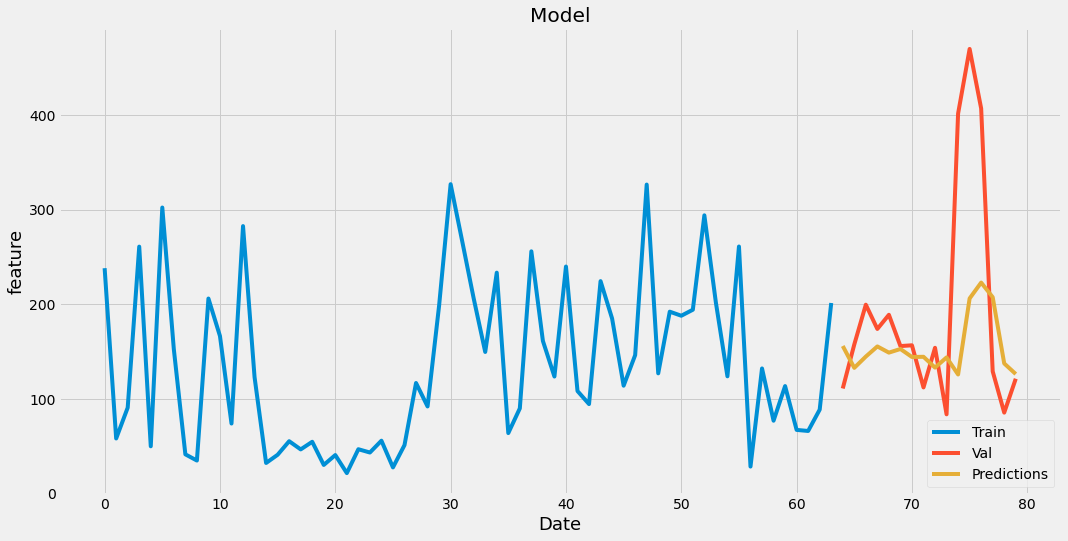

In [105]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('feature', fontsize=18)
plt.plot(train['feature'])
plt.plot(valid[['feature', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [106]:
#Show the valid and predicted prices
valid

,feature,Predictions
64,110.79,155.709793
65,157.37,132.607986
66,199.37,144.538132
67,173.72,155.251694
68,188.69,148.714096
69,155.62,152.531738
70,156.46,144.090775
71,111.91,144.305527
72,153.83,132.895370
73,83.51,143.633133


Make Future Predictions

In [110]:
#Get the quote
feature_quote = pd.read_csv('train_csv.csv')
#Create a new dataframe
new_df = feature_quote.filter(['feature'])

#Get teh last 60 day closing price 
last_1_days = new_df[79:80].values
#Scale the data to be values between 0 and 1
last_1_days_scaled = scaler.transform(last_1_days)
#Create an empty list
X_test = []
#Append teh past 1 days
X_test.append(last_1_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[135.25763]]
